# Cartes du monde, cartes de France
## *Planisphères et projections*

L'objectif de cette séance est de se familiariser avec un format courant de description de contours, le format shapefile, et avec différentes projections couramment utilisées.

Ce notebook est certainement (trop) long. Il n'est pas attendu de vous de tout faire dans le temps de la séance et il ne faut pas se décourager si de nombreux points restent non traités ; les nombreux « bonus » à la fin occuperont les meilleurs. 

Plan du notebook:
1. [Le format shapefile](#Le-format-shapefile)
2. [Coordonnées et projections](#Coordonnées-et-projections)
3. [Notions de géodésie](#Notions-de-géodésie)

Il est **indispensable** pour la suite d'avoir :
- coder la projection Mercator
- coder la projection Lambert 93

C'est le **minimum** requis pour les séances suivantes.

Une fois ce minimum accompli, si vous êtes curieux, il est préférable de laisser dans un premier temps les bonus de côté pour voir les notions de géodésie.

## Le format shapefile

Le site de la commission européenne met à disposition un certain nombre de données géographiques. On y trouve notamment une [page](http://ec.europa.eu/eurostat/fr/web/gisco/geodata/reference-data/administrative-units-statistical-units) permettant de télécharger les contours d'entités administratives, notamment les pays du monde.

La version actuelle en téléchargement est celle de 2014. On peut alors télécharger le fichier shapefile au 1/3000000. Le format shapefile est un format géographique standard qui permet de décrire la géométrie d'objets d'écrits, à base de points, de lignes et de polygones.

On peut alors récupérer sur la page indiquée le fichier `CNTR_2014_03M_SH.zip` dans lequel, on trouvera un fichier à l'extension `.shp` contenant les contours recherchés. Ces données sont déjà accessibles pour vous dans le dossier `data`.

In [1]:
shapefile_path = "./data/CNTR_2014_03M_SH/Data/CNTR_RG_03M_2014.shp"

La bibliothèque `fiona` permet de déchiffrer les fichiers binaires au format shapefile `.shp`.  
Observons la structure des données:

In [2]:
import fiona

items = [p for p in fiona.open(shapefile_path)]
items[0]

{'geometry': {'coordinates': [[(1.72580099999999, 42.50440200000003),
    (1.6569334999999796, 42.468219999999974),
    (1.5609830000000215, 42.45865250000003),
    (1.5524280000000203, 42.43292250000002),
    (1.4499534999999923, 42.437996),
    (1.4334465000000023, 42.4818535),
    (1.4682730000000106, 42.510020999999995),
    (1.4504519999999843, 42.539897999999994),
    (1.413772999999992, 42.53564449999999),
    (1.4425659999999993, 42.60366800000003),
    (1.4765615000000025, 42.61307549999998),
    (1.4767219170000203, 42.615477892),
    (1.4767354360000127, 42.615680349),
    (1.4769826770000236, 42.619383011000025),
    (1.4791384999999764, 42.65166850000003),
    (1.4824240529999884, 42.651771043999986),
    (1.4856490469999812, 42.65187169799998),
    (1.4869175360000213, 42.65191128800001),
    (1.4945106659999965, 42.652148275),
    (1.4945358059999876, 42.65214906),
    (1.5429720110000176, 42.653660789000014),
    (1.5438657089999879, 42.653688681999995),
    (1.55271900

Chaque élément produit par `fiona.open()` est un élément graphique.  
Les données sont présentées sous la forme d'un dictionnaire qui respecte l'arborescence suivante:

- `geometry`
    - `coordinates`
    - `type`
- `id`
- `properties`
- `type`

**Note:**

- `geometry.type` précise la forme de la donnée géométrique (point, ligne, polygone) parmi un certain nombre de format standards. On recense notamment `Point`, `Polygon`, `LineString` et leur version en liste `MultiPoint`, `MultiPolygon`, `MultiLineString`.
- `properties` contient également un dictionnaire pour lequel le modèle de données est libre. Chaque éditeur fournit les informations qu'il souhaite.

Parmi les propriétés fournies ici, on trouve un champ `CNTR_ID`, qui évoque *country id*. Ici, `AD` est le code [ISO-3166-1](https://fr.wikipedia.org/wiki/ISO_3166-1) pour  Andorre.

Le module `shapely` permet de construire des données géométriques à partir du dictionnaire rendu par `fiona`. La fonction `shape` produit un objet qui est rendu par sa représentation graphique dans le notebook.

<class 'shapely.geometry.polygon.Polygon'>


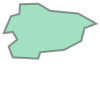

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon, Polygon, shape

s = shape(items[0]['geometry'])
print (type (s))
s

<div class="alert alert-warning">
**Exercice:** Afficher les codes pays des données fournies dans le fichier shapefile donné.
</div>

_**Consigne:** Utiliser la forme en *compréhension de liste*. Il est « interdit » d'utiliser plus d'une ligne de code pour cet exercice._

<div class="alert alert-warning">
**Exercice:** Trouver l'élément géométrique relatif à la Suisse dans les données téléchargées et l'afficher.
</div>

_**Note:** Pour les plus patriotes qui auraient voulu afficher la France, les territoires d'Outre-Mer rendent l'aperçu peu lisible à l'échelle mondiale. Le choix s'est alors porté sur un pays réputé « neutre »._

On peut utiliser la forme en compréhension:
```python
[i for i in item if i ...]
```

Pour la suite, nous allons toutefois afficher manuellement les données avec `matplotlib`.  
Nous allons devoir manipuler deux types de données:

In [5]:
shapes = [shape(i['geometry']) for i in items]
print (set([s.geom_type for s in shapes]))

{'Polygon', 'MultiPolygon'}


Pour cela, nous allons utiliser les fonctions `add_patch` de `matplotlib` et l'objet `PolygonPatch` qui transforme un polygone shapefile en objet manipulable par `matplotlib`.

On notera :

- l'accès à l'attribut `geom_type`;
- les attributs de `PolygonPatch`: `fc` pour `facecolor`, `ec` pour `edgecolor`, `alpha` pour la transparence, et `zorder` pour le niveau de superposition des données;
- les *finitions* en fin de code.

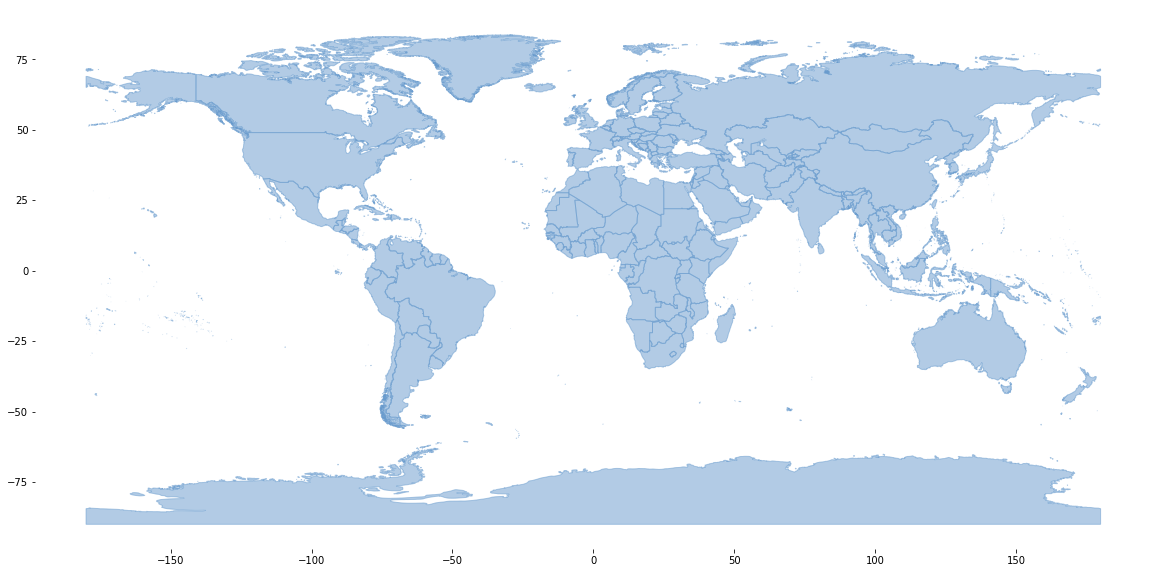

In [6]:
from descartes import PolygonPatch

fig = plt.figure()
ax = fig.gca()

for s in shapes:
    if s.geom_type == "Polygon":
        s = MultiPolygon([s])
    for idx, p in enumerate(s):
        ax.add_patch(PolygonPatch(p, fc='#6699cc', ec='#6699cc', alpha=0.5, zorder=2))

# Finitions
ax.axis('scaled')
fig.set_size_inches(20, 10)
ax.set_frame_on(False)

## Coordonnées et projections

La carte présentée ci-dessus est déformée/dilatée par rapport à l'image qui nous est familière. *En réalité, c'est aussi une projection, équirectangulaire, appelée *plate carrée*. Sa seule propriété notable est qu'elle permet de retrouver facilement latitude et longitude à partir des coordonnées sur le plan. (sic!)*

Les données que nous avons récupérées sont fournies en latitude/longitude dans le référentiel ETRS89. La Terre est modélisée au premier ordre par une sphère, mais les modélisations plus précises font appel à un ellipsoïde de référence. Historiquement, chaque pays maintient son système de référence; en effet, la dérive des continents complique l'utilisation d'un système de référence mondial.

Pour les systèmes GPS notamment, un référentiel normalisé mondial a été proposé: le WGS84 (*World Geodetic System 1984*, après 1972, 1964, 1960).  
Celui-ci définit pour l'ellipsoïde de référence:
 - un demi-grand axe $a	= 6\,378\,137\,m$
 - un aplatissement $f = 1\,/\,298,257\,223\,563$
 
Pour les précisions qui nous intéressent dans notre exemple, les systèmes ETRS89 et WGS84 sont compatibles. On va même, pour la suite, pousser jusqu'à considérer que les coordonnées manipulées sont compatibles avec des coordonnées sphériques.


Pour afficher une carte à l'écran, on choisit systématiquement une projection, c'est-à-dire une manière de représenter l'information de la surface d'une sphère sur une surface plane.

### La projection de Mercator

La projection la plus connue est celle de Mercator, qui date du XVIe siècle, utilisée par les marins. C'est une projection *conforme*, qui respecte les angles et les formes. Les méridiens et les parallèles sont des droites perpendiculaires, et la déformation Est-Ouest inhérente à la projection sur un cône est compensée par une déformation Nord-Sud de même ampleur : l'échelle Est-Ouest est toujours de l'ordre de l'échelle Nord-Sud.

On peut calculer la projection $(x,y)$ des coordonnées en latitude $\varphi$ et longitude $\lambda$ avec les formules suivantes.

$$
    x = \lambda\\
    y = \ln \left( \tan \varphi + \sec \varphi \right)
$$

<div class="alert alert-warning">
**Exercice:** Afficher la carte précédente en projection de Mercator.
</div>

_**Consigne:** N'utiliser que des fonctions `numpy` pour garder des temps de calcul raisonnables._

- À partir de `p`, l'argument de type `Polygon` passé à `PolygonPatch`, vous pouvez extraire les coordonnées en latitude et en longitude du polygone de la manière suivante:
```python
    lon = np.array([lon for (lon, _) in list(p.exterior.coords)])
    lat = np.array([lat for (_, lat) in list(p.exterior.coords)])
```

- Une fois votre polygone reconstruit dans le système de coordonnées qui vous convient, vous pouvez reconstruire un `Polygon` à passer en paramètre à `PolygonPatch`:
```python
    p = Polygon([a for a in zip(x, y)])
```

- Pour éviter les ennuis près des pôles, éliminez l'Antartique (ISO 3166-1: `AQ`) de vos données.

### La projection Lambert 93

Beaucoup de projections ne permettent pas d'afficher le globe terrestre dans son intégralité, au moins à cause des discontinuités aux pôles. On trouve notamment des projections qui sont élégantes localement mais beaucoup moins à l'échelle mondiale.

Les pilotes aiment cette projection parce qu'à l'échelle où l'on trace ces cartes, une ligne droite entre deux points est proche du grand cercle qui passe par ces deux points. Dans ce système de projection conforme, les méridiens sont des droites concourantes, et les parallèles des arcs de cercle centrés sur le point de convergence des méridiens.


La projection Lambert 93 est la projection officielle utilisée pour les cartes de France métropolitaine. Elle utilise deux parallèles sécants $\varphi_1$ à 44°N, $\varphi_2$ à 49°N, le méridien de référence $\lambda_0$ à 3°E et le parallèle d'origine $\varphi_0$ à 46°30'.

On peut calculer la projection $(x,y)$ des coordonnées en latitude $\varphi$ et longitude $\lambda$ avec les formules suivantes.


$$
    x = x_0 + \rho \sin(n (\lambda - \lambda_0))\\
    y = y_0 + \rho_0 - \rho \cos(n (\lambda - \lambda_0))
$$

On choisit ici de rester en modèle sphérique pour ne pas trop compliquer l'expression de $n$.

$$
    n = \frac{\ln(\cos \varphi_1 \sec \varphi_2)}{\ln (\tan (\frac14 \pi + \frac12 \varphi_2) \cot (\frac14 \pi + \frac12\varphi_1))}
$$

Les expressions manquantes sont alors exprimées comme suit.

$$
    \rho = F \cot^{n} (\tfrac14 \pi + \tfrac12 \varphi)\\
    \rho_0 = F \cot^{n} (\tfrac14 \pi + \tfrac12 \varphi_0)\\
    F = R_T \cdot \frac{\cos \varphi_1 \tan^{n} (\frac14 \pi + \frac12 \varphi_1)}{n} 
$$  

Les coordonnées initiales sont de $x_0,y_0$ valent respectivement 700000m et 6600000m. Le rayon de la Terre $R_T$ mesure 6371000 m.

<div class="alert alert-warning">
**Exercice:** Afficher une carte de France (métropole et Corse) et de ses pays frontaliers en projection de Lambert 93.
</div>

_**Consigne:** N'utiliser que des fonctions `numpy` pour garder des temps de calcul raisonnables._

### Petits bonus

1. Afficher la France dans une couleur différente de ses pays frontaliers;
2. Ajouter un graticule (méridiens et parallèles multiples de 5° par exemple);

### Gros bonus

Les projections présentées ici sont *conformes*: elles conservent les angles et les formes. D'autres projections sont *équivalentes*, c'est-à-dire qu'elles conservent localement les surfaces, mais beaucoup des projections les plus utilisées sont finalement ni conformes, ni équivalentes, mais des compromis.

À cet égard, la National Geographic Society a longtemps utilisé la projection Winkel-Tripel, conçue pour minimiser les distorsions de surface, de direction et de distance (d'où le terme allemand de *tripel*). Cette projection est très esthétique et harmonieuse, mais cette harmonie vient à un prix : il n'existe pas de formule exacte pour repasser des coordonnées cartésiennes en $(x,y)$ à des coordonnées en latitude et longitude.

<div class="alert alert-warning">
**Bonus:** Afficher une carte du monde en projection Winkel-Tripel
</div>

## Notions de géodésie

Les calculs de distance, de cap, de chemin le plus court entre deux points ne sont pas immédiats en géométrie sphérique (et a fortiori, sur le modèle ellipsoïdal WGS84). 

On sait notamment que la route la plus courte entre deux points à la surface d'une sphère est située sur l'intersection d'un plan qui passe par le centre de la Terre et nos deux points. On appelle ce(tte) (segment de) droite un « grand cercle ».

Nous avons à disposition une bibliothèque de calcul de géodésie sphérique. Un autre aspect de la bibliothèque propose les mêmes interfaces en WGS84, mais les calculs sont sensiblement plus lourds: nous nous contenterons de la géodésie sphérique.

In [7]:
import geodesy.sphere as geo

# À l'origine, la définition du mille nautique était la distance entre deux minutes d'arc à l'équateur
# Néanmoins, aujourd'hui, la conversion est fixée à 1 nm = 1852 meters

geo.distance((0, 0), (0, 1./60))

1853.2487774093122

<div class="alert alert-warning">
**Exercice**: Calculer la distance entre les aéroports de Paris Orly et de Toulouse Blagnac.
</div>

In [8]:
orly = (48.725278, 2.359444)
blagnac = (43.629075, 1.363819)
print("Distance de %.2f km" % (geo.distance(orly, blagnac)/1000))

Distance de 571.82 km


<div class="alert alert-warning">
**Exercice**: Tracer un grand cercle entre les aéroports de Paris Charles de Gaulle et Tokyo Narita (projection de Mercator ou Winkel-Tripel)
</div>

In [12]:
cdg = (49.012779, 2.55)
tokyo = (35.764722, 140.386389)

gc = geo.greatcircle(cdg, tokyo)


<div class="alert alert-warning">
**Exercice**: Tracer un grand cercle entre les aéroports de Paris Orly et de Toulouse Blagnac (projection Lambert 93).
</div>